In [164]:
#Loading libraries:
import pandas as pd
import numpy as np
import os

In [165]:
#Setting new path:
os.chdir("/Users/juanvasquez/Downloads")

In [166]:
#Loading csv dataframes:
df = pd.read_csv("dataframe_DF.csv")
df.dropna(axis=0, how='any',thresh=None, subset=None, inplace=True)
df.head()

,user_id,country,age_group,assets,asset_categories,platforms,number_of_trades,first_trades,saving_trades,trade_amount,...,saving_plans,states,new_savings_plans,new_saving_users,frecuencies,trade_amount_saving_plans,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
0,u2,Austria,18-24,25,4,2,275,1,39,114633,...,5,2,5,1,3,1425,742.435897,741.641026,312.487179,1380.230769
1,u10,Germany,25-32,9,1,2,45,1,18,16000,...,8,2,8,1,2,2850,1286.777778,1286.777778,423.222222,736.722222
2,u9,Germany,33-40,1,1,2,8,1,5,1706,...,1,1,1,1,1,250,30.000000,30.000000,864.000000,2285.000000
3,u32,Germany,33-40,13,2,2,56,1,7,24631,...,3,1,3,1,1,300,900.285714,899.571429,652.285714,1667.428571
4,u31,Germany,18-24,6,2,2,29,1,2,12944,...,1,1,1,1,1,50,45.000000,44.000000,282.000000,450.000000


In [167]:
#Description of the sample
df.describe()

,assets,asset_categories,platforms,number_of_trades,first_trades,saving_trades,trade_amount,trades,saving_plans,states,new_savings_plans,new_saving_users,frecuencies,trade_amount_saving_plans,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
count,998.000000,998.000000,998.000000,998.000000,998.0,998.000000,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,9.983968,1.797595,1.806613,65.670341,1.0,12.823647,2.721387e+04,12.774549,2.745491,1.262525,2.748497,1.003006,1.222445,644.127255,660.468212,593.875063,381.302408,1184.161419
std,9.002159,0.895276,0.436173,120.913377,0.0,15.942379,5.994934e+04,15.952798,2.886581,0.466768,2.885976,0.054772,0.503366,1110.216102,649.354859,617.392648,226.885217,601.399351
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.500000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,2.000000,16.000000,1.0,4.000000,3.855500e+03,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,63.250000,43.250000,284.187500,692.625000
50%,7.000000,2.000000,2.000000,36.000000,1.0,8.000000,1.085050e+04,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,325.000000,508.850000,414.469697,336.000000,1220.083333
75%,14.000000,2.000000,2.000000,70.750000,1.0,17.000000,2.878475e+04,17.000000,3.000000,1.750000,3.000000,1.000000,1.000000,675.000000,1075.000000,943.454034,513.512222,1721.675000
max,52.000000,5.000000,3.000000,2784.000000,1.0,211.000000,1.377886e+06,211.000000,20.000000,3.000000,20.000000,2.000000,4.000000,12945.000000,2875.523810,2851.380952,1579.000000,2285.000000


In [168]:
#Libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [170]:
#After testing with the different variables, the best segmentation was obtained with:
X = np.array(df[["number_of_trades","saving_trades","trade_amount","saving_plans","trade_amount_saving_plans"]])
y = np.array(df["saving_plans"])
X.shape

(998, 5)

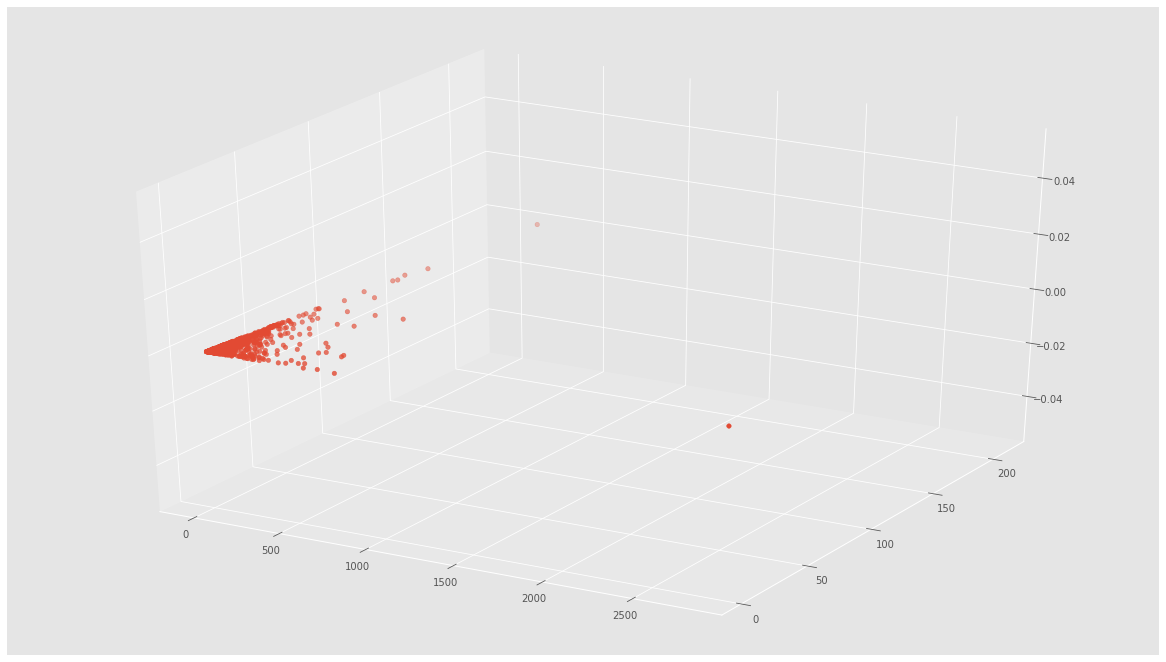

In [171]:
#Plotting points without segmentation.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1]) 
           #,y,s=60)

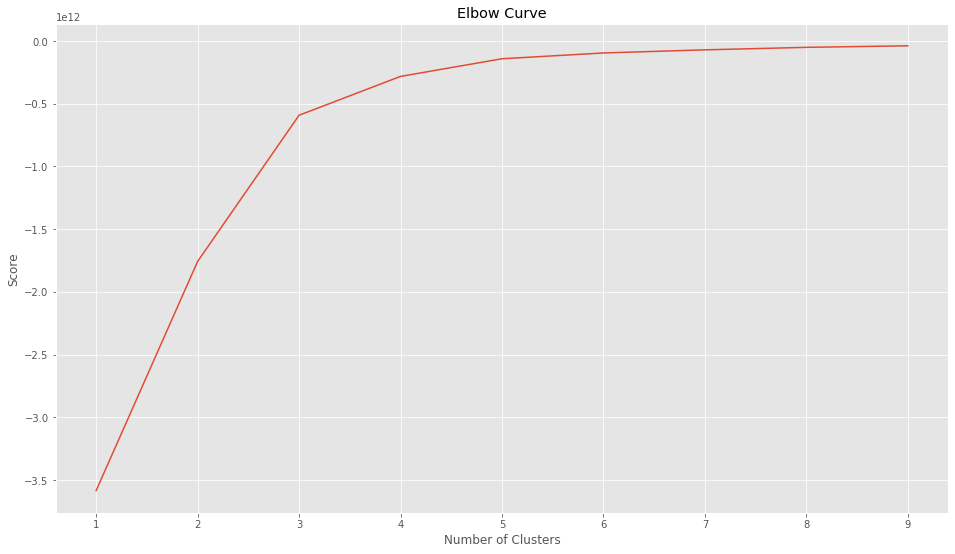

In [172]:
#Best number of clusters for the sample:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [173]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.41900648e+01 1.28077754e+01 1.63905486e+04 2.67386609e+00
  6.46582073e+02]
 [3.07535211e+02 1.29859155e+01 1.49350817e+05 3.70422535e+00
  6.15549296e+02]
 [2.78400000e+03 1.60000000e+01 1.37788600e+06 1.00000000e+00
  4.00000000e+02]]


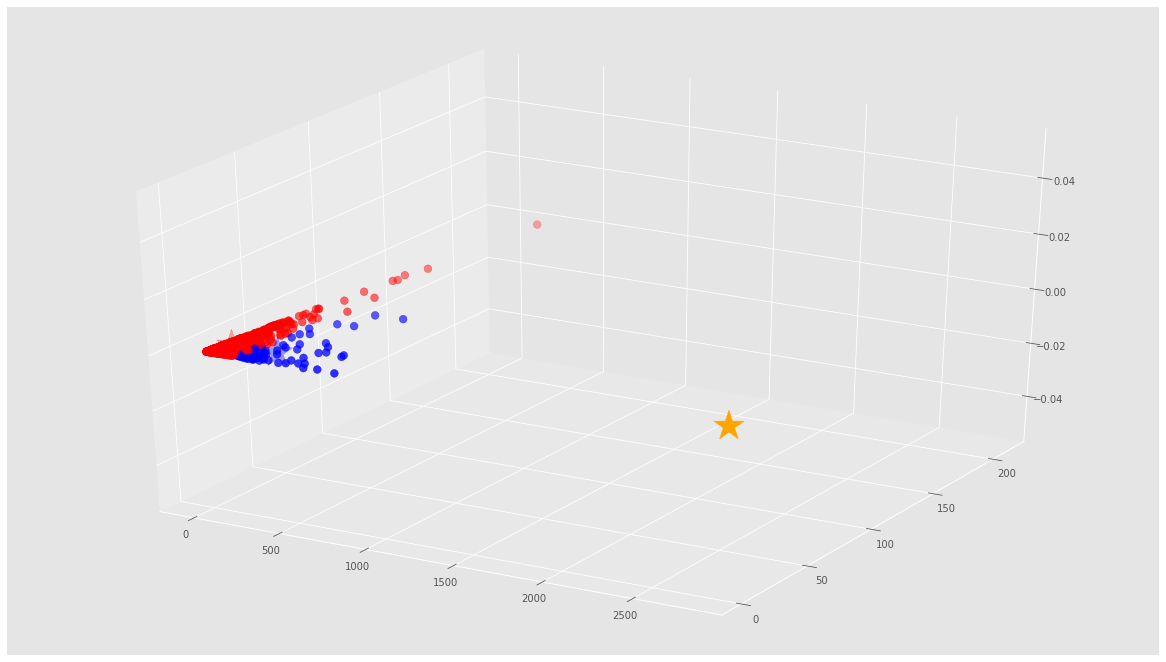

In [174]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red', 'blue','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

In [175]:
#PCA
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Removing some columns.
features_df = df.drop(["assets","asset_categories","user_id","country","age_group","user_id1","platforms","first_trades","saving_plans", "states"],axis='columns')
features_df.head()

,number_of_trades,saving_trades,trade_amount,trades,new_savings_plans,new_saving_users,frecuencies,trade_amount_saving_plans,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
0,275,39,114633,39,5,1,3,1425,742.435897,741.641026,312.487179,1380.230769
1,45,18,16000,18,8,1,2,2850,1286.777778,1286.777778,423.222222,736.722222
2,8,5,1706,5,1,1,1,250,30.000000,30.000000,864.000000,2285.000000
3,56,7,24631,7,3,1,1,300,900.285714,899.571429,652.285714,1667.428571
4,29,2,12944,2,1,1,1,50,45.000000,44.000000,282.000000,450.000000


In [178]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(features_df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [180]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = features_df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
)

,number_of_trades,saving_trades,trade_amount,trades,new_savings_plans,new_saving_users,frecuencies,trade_amount_saving_plans,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
PC1,0.195234,0.450155,0.144587,0.450012,0.430306,-0.010453,0.309025,0.332310,0.234391,0.241327,-0.160607,-0.075213
PC2,-0.143993,0.315725,-0.183125,0.314631,-0.021005,-0.037988,-0.078448,0.256326,-0.460282,-0.453479,0.177249,0.473704
PC3,0.655739,-0.028991,0.664926,-0.028734,-0.104902,-0.017332,-0.084552,-0.040605,-0.228776,-0.224936,0.009437,0.055553
PC4,-0.062315,0.042722,-0.069839,0.041813,-0.060497,0.560260,0.018629,0.026815,-0.265718,-0.268174,-0.636707,-0.348037
PC5,0.016490,-0.093330,0.023916,-0.095368,0.294928,0.588584,0.489212,-0.226414,-0.072055,-0.068091,0.490197,0.084997
PC6,0.054466,0.084024,0.051259,0.087682,-0.199820,0.577511,-0.563259,0.245814,0.276375,0.281353,0.175242,0.205606
PC7,-0.031101,-0.258502,0.015464,-0.260747,0.269814,-0.045086,-0.117591,0.704336,-0.125137,-0.147062,0.267568,-0.412738
PC8,0.006044,-0.188775,0.041333,-0.192177,-0.481740,0.043983,0.536844,0.461876,0.096471,0.107998,-0.194602,0.362363
PC9,0.008135,0.270551,-0.030561,0.270945,-0.606356,-0.017923,0.179509,-0.013472,0.009527,-0.043869,0.395640,-0.541711
PC10,0.002203,-0.003848,0.003667,-0.004385,0.016752,0.004166,-0.000315,-0.003722,0.709662,-0.703271,-0.017500,0.033462


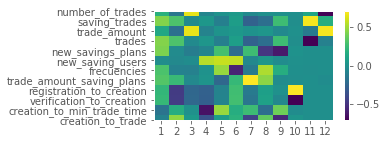

In [181]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(features_df.columns)), features_df.columns)
plt.xticks(range(len(features_df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [184]:
#Copying the data frame
copy =  pd.DataFrame()
copy['user_id']=df['user_id'].values
copy['country']=df['country'].values
copy['age_group']=df['age_group'].values
copy['assets']=df['assets'].values
copy['asset_categories']=df['asset_categories'].values
copy['age_group']=df['age_group'].values
copy['number_of_trades']=df['number_of_trades'].values
copy['saving_trades']=df['saving_trades'].values
copy['trade_amount']=df['trade_amount'].values
copy['trades']=df['trades'].values
copy['saving_plans']=df['saving_plans'].values
copy['states']=df['states'].values
copy['new_savings_plans']=df['new_savings_plans'].values
copy['frecuencies']=df['frecuencies'].values
copy['trade_amount_saving_plans']=df['trade_amount_saving_plans'].values
copy['registration_to_creation']=df['registration_to_creation'].values
copy['verification_to_creation']=df['verification_to_creation'].values
copy['creation_to_min_trade_time']=df['creation_to_min_trade_time'].values
copy['creation_to_trade']=df['creation_to_trade'].values

copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['clientes']=copy.groupby('label').size()
cantidadGrupo

,color,clientes
0,red,926
1,blue,71
2,orange,1


In [193]:
#Including clusters name and applying it to dataframe:
def label_customer(column):
    if column == 0:
        return 'Scopper'
    elif column == 2:
        return 'Gold'
    elif column == 1:
        return 'Silver'
    
copy['Cluster'] = copy['label'].apply(label_customer)
copy.head()

,user_id,country,age_group,assets,asset_categories,number_of_trades,saving_trades,trade_amount,trades,saving_plans,states,new_savings_plans,frecuencies,trade_amount_saving_plans,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade,label,Cluster
0,u2,Austria,18-24,25,4,275,39,114633,39,5,2,5,3,1425,742.435897,741.641026,312.487179,1380.230769,1,Silver
1,u10,Germany,25-32,9,1,45,18,16000,18,8,2,8,2,2850,1286.777778,1286.777778,423.222222,736.722222,0,Scopper
2,u9,Germany,33-40,1,1,8,5,1706,5,1,1,1,1,250,30.000000,30.000000,864.000000,2285.000000,0,Scopper
3,u32,Germany,33-40,13,2,56,7,24631,7,3,1,3,1,300,900.285714,899.571429,652.285714,1667.428571,0,Scopper
4,u31,Germany,18-24,6,2,29,2,12944,2,1,1,1,1,50,45.000000,44.000000,282.000000,450.000000,0,Scopper


In [194]:
#Number of trades, trade amount, saving trades, trade amount saving plans, assets average
df_cluster = copy.groupby(["Cluster"])[("number_of_trades","trade_amount","saving_trades","trade_amount_saving_plans","saving_plans","assets")].mean()
df_cluster


,number_of_trades,trade_amount,saving_trades,trade_amount_saving_plans,saving_plans,assets
Cluster,,,,,,
Gold,2784.000000,1.377886e+06,16.000000,400.000000,1.000000,30.000000
Scopper,44.190065,1.639055e+04,12.807775,646.582073,2.673866,8.507559
Silver,307.535211,1.493508e+05,12.985915,615.549296,3.704225,28.957746


In [195]:
#Date differences average
df_cluster = copy.groupby(["Cluster"])[("registration_to_creation","verification_to_creation","creation_to_min_trade_time","creation_to_trade")].mean()
df_cluster

,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
Cluster,,,,
Gold,1.000000,0.000000,280.000000,1540.187500
Scopper,646.268965,579.476405,385.761351,1207.531266
Silver,854.946685,790.030454,324.574536,874.351491


In [196]:
#Number of trades, trade amount, saving trades, trade amount saving plans, assets average
df_country = copy.groupby(["country"])[("number_of_trades","trade_amount","saving_trades","trade_amount_saving_plans","saving_plans","assets")].mean()
df_country


,number_of_trades,trade_amount,saving_trades,trade_amount_saving_plans,saving_plans,assets
country,,,,,,
Austria,66.540741,28000.903704,11.811111,550.000000,2.529630,11.044444
Belgium,222.000000,107061.000000,6.500000,300.000000,2.000000,23.000000
Czech Republic,41.000000,23459.000000,1.000000,100.000000,1.000000,12.000000
France,54.892857,20502.750000,15.500000,598.928571,2.642857,8.714286
Germany,63.375000,25933.134868,13.253289,692.812500,2.889803,9.393092
Ireland,14.500000,3936.750000,9.000000,1087.500000,2.500000,3.000000
Italy,42.000000,18211.909091,6.363636,370.363636,1.272727,7.636364
Luxembourg,31.500000,13552.000000,3.500000,562.500000,2.500000,2.500000
Netherlands,48.875000,16174.500000,17.375000,680.250000,2.375000,5.875000


In [200]:
#Sum of impressions, clicks, installs, campaigns and creative by cluster: 
df_country_time = copy.groupby(["country"])[("registration_to_creation","verification_to_creation","creation_to_min_trade_time","creation_to_trade")].mean()
df_country_time

,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
country,,,,
Austria,724.761872,663.006977,407.980292,1213.482830
Belgium,353.630952,353.130952,176.214286,936.297619
Czech Republic,14.000000,13.000000,0.000000,0.000000
France,749.514861,704.890163,354.964366,1265.325717
Germany,609.920964,541.873543,405.362946,1230.417741
Ireland,783.145833,782.858333,389.541667,1062.620833
Italy,627.861014,485.630245,330.559441,954.631527
Luxembourg,306.375000,184.750000,0.000000,336.000000
Netherlands,445.611607,400.888393,440.540179,1420.246928


In [197]:
#Sum of impressions, clicks, installs, campaigns and creative by cluster: 
df_age = copy.groupby(["age_group"])[("number_of_trades","trade_amount","saving_trades","trade_amount_saving_plans","saving_plans","assets")].mean()
df_age


,number_of_trades,trade_amount,saving_trades,trade_amount_saving_plans,saving_plans,assets
age_group,,,,,,
18-24,57.711712,24801.783784,8.783784,334.612613,2.486486,9.729730
25-32,58.933962,23312.845912,13.632075,562.468553,3.003145,9.569182
33-40,65.266160,27268.133080,12.053232,589.912548,2.589354,10.505703
41-48,74.403974,32142.331126,12.026490,708.443709,2.867550,11.317881
49-56,95.649485,40604.350515,16.536082,832.917526,2.742268,9.876289
57-64,45.568182,18087.500000,13.727273,1462.431818,2.204545,6.613636
65+,50.642857,16676.857143,21.000000,1397.857143,2.285714,8.571429


In [201]:
#Sum of impressions, clicks, installs, campaigns and creative by cluster: 
df_age_time = copy.groupby(["age_group"])[("registration_to_creation","verification_to_creation","creation_to_min_trade_time","creation_to_trade")].mean()
df_age_time

,registration_to_creation,verification_to_creation,creation_to_min_trade_time,creation_to_trade
age_group,,,,
18-24,693.497319,628.768294,359.113188,1030.039407
25-32,717.496760,651.643130,374.892880,1136.294714
33-40,615.255418,549.388250,400.839429,1203.554855
41-48,664.795424,604.316557,370.778688,1166.740560
49-56,674.798318,592.854747,374.537397,1297.212882
57-64,470.617100,385.123448,408.898477,1509.362894
65+,403.302200,391.304631,409.449369,1511.616730


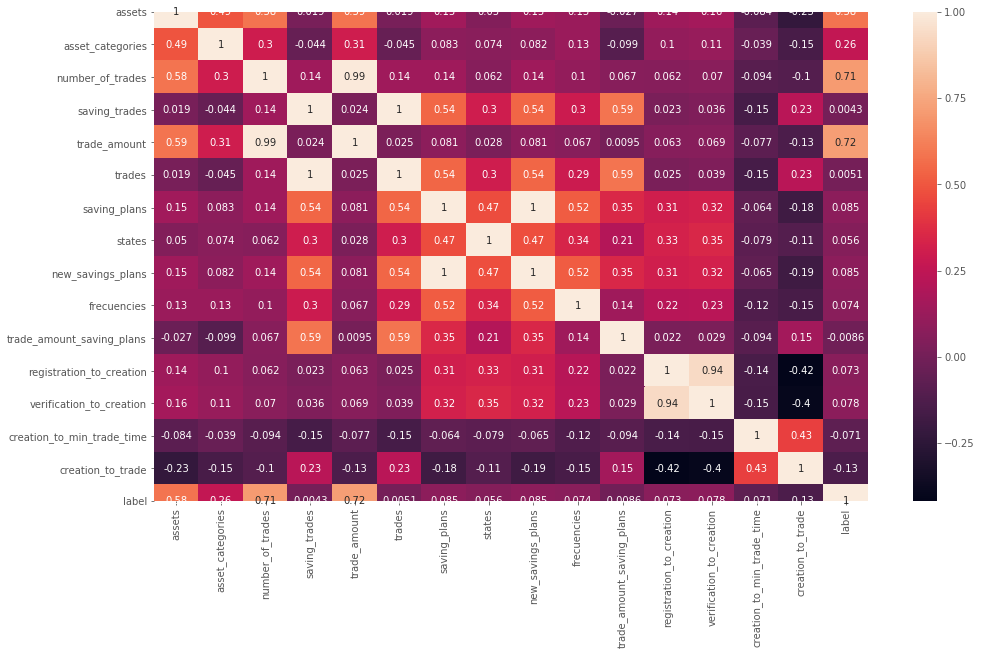

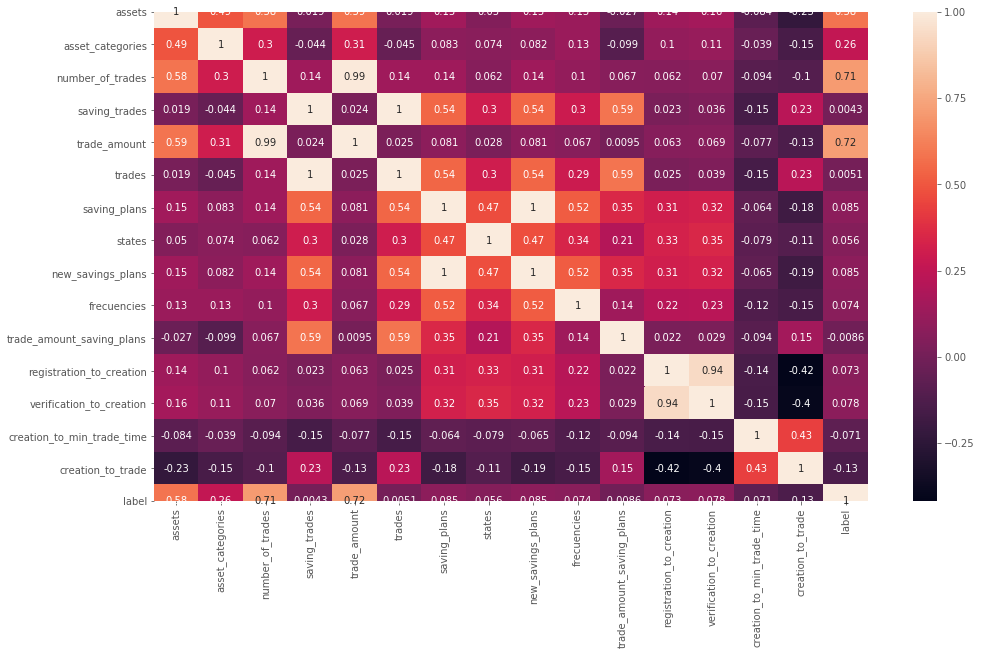

In [198]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = copy.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [199]:
copy.to_csv('clusters.csv')